In [1]:
%matplotlib notebook

import time
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

<IPython.core.display.Javascript object>


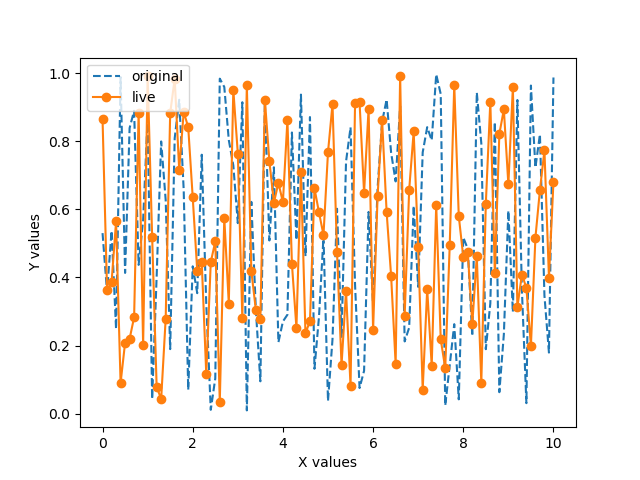

In [2]:
def get_trace(xvals):
    yvals = np.random.rand(xvals.size)
    return yvals

def do_something_and_update_plot(ax, linex, line=None): 
    liney = get_trace(linex)
    time.sleep(0.5)
    
    if line is None:
        line = ax.plot(linex, liney, 'o-', label='live')[0]
        ax.legend(loc='upper left')
    else:
        line.set_ydata(liney)
    
    ax.relim()
    ax.autoscale_view(True, True, True)
    ax.get_figure().canvas.draw()
    return line
        

linex = np.linspace(0, 10, 101)
liney = get_trace(linex)
update_line = None

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('X values')
ax.set_ylabel('Y values')

ax.plot(linex, liney, '--', label='original')
ax.legend(loc='upper left')

for i in range(10):
    update_line = do_something_and_update_plot(ax, linex, line=update_line)